In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**LOAD BOTH TEST AND TRAIN DATASET**

In [2]:
train = pd.read_csv("/content/Titanic_train.csv")
test = pd.read_csv("/content/Titanic_test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Passenger ID, Ticket and Name columns are of no use. Hence we are dropping them.**

In [4]:
train.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [9]:
train.drop(['Cabin'], axis = 1, inplace = True)
test.drop(['Cabin'], axis = 1, inplace = True)

**Cabin has too much missing values, so it is best to drop it.**

In [10]:
print(train.shape)
print(test.shape)

(891, 8)
(418, 7)


**MERGE BOTH DATASETS**

In [11]:
data = pd.concat([train, test], axis = 0)

In [12]:
data.shape

(1309, 8)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 92.0+ KB


In [14]:
data.dropna(subset=['Survived'], inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


**TREAT MISSING VALUES**

**Treating with median is increaing the skewness too much.**

**So we treated missing values with mean.**

In [15]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [16]:
mode_value = data['Age'].mode()[0]  # Get the mode (most frequent value)
data['Embarked'].fillna(mode_value, inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


# EDA

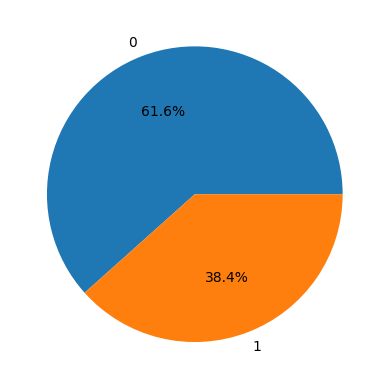

In [18]:
plt.pie(data['Survived'].value_counts(), labels = ['0', '1'], autopct = '%1.1f%%')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

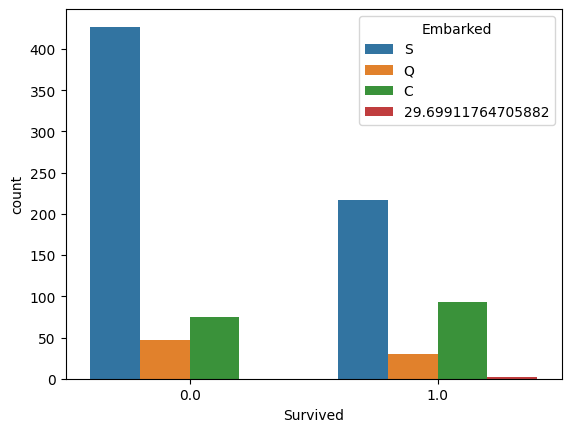

In [19]:
sns.countplot(x='Survived',data= data,hue='Embarked')

**PEOPLE WHO BOARDED FROM SOUTHAMPTON DIED MORE.**

In [20]:
data['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


<Axes: xlabel='Survived', ylabel='count'>

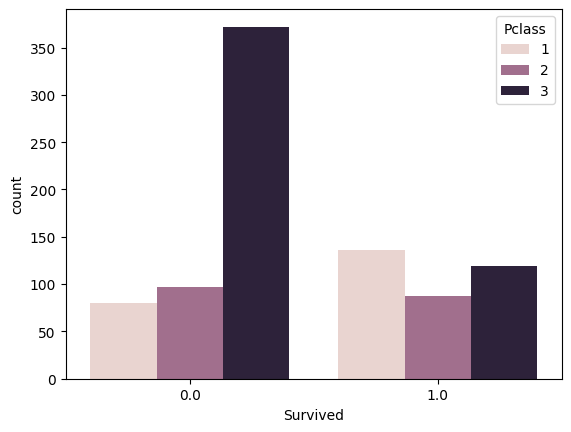

In [21]:
sns.countplot(x='Survived',data= data ,hue='Pclass')

**PEOPLE FROM 1 CLASS SURVIVED MORE AND PEOPLE FROM 3 CLASS DIED MORE.**

<Axes: xlabel='Survived', ylabel='count'>

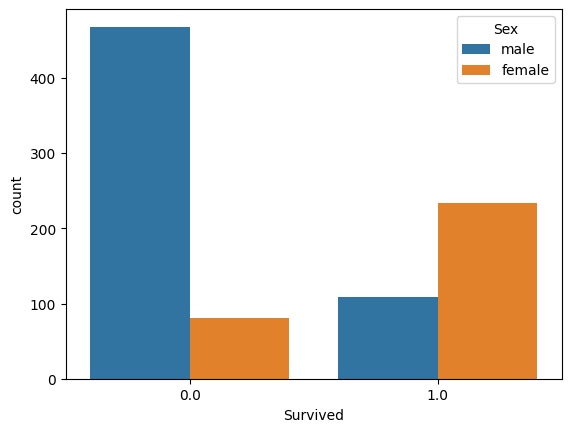

In [22]:
sns.countplot(x='Survived',data= data,hue='Sex')

**MOSTLY WOMEN SURVIVED.**

<Axes: xlabel='Survived', ylabel='count'>

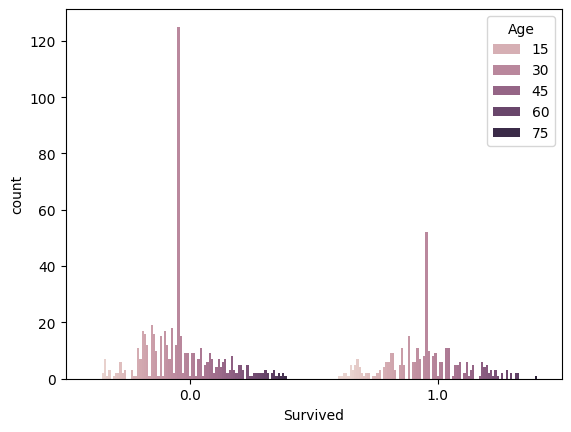

In [23]:
sns.countplot(x='Survived', data= data, hue="Age")

In [24]:
data['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


<Axes: xlabel='SibSp', ylabel='count'>

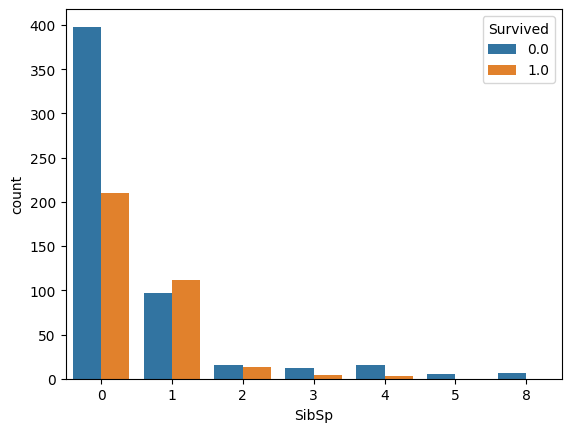

In [25]:
sns.countplot(x='SibSp',data= data,hue='Survived')

<Axes: >

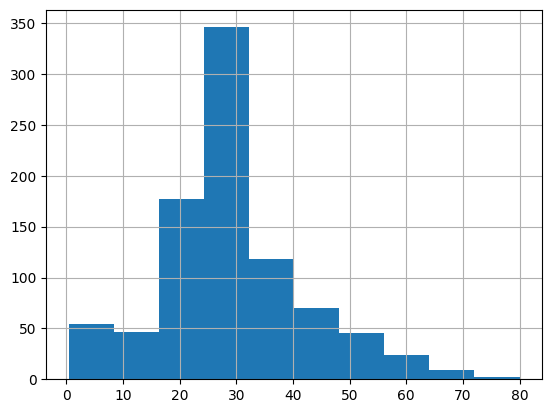

In [26]:
data['Age'].hist()

In [27]:
data['Age'].skew()

0.4344880940129925

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.select_dtypes(include='object'):
  # Convert the column to string type before applying LabelEncoder
  data[col] = data[col].astype(str)
  data[col] = le.fit_transform(data[col])

In [29]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,3
1,1.0,1,0,38.0,1,0,71.2833,1
2,1.0,3,0,26.0,0,0,7.9250,3
3,1.0,1,0,35.0,1,0,53.1000,3
4,0.0,3,1,35.0,0,0,8.0500,3


In [30]:
data['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [31]:
data.to_csv('processed_data.csv', index=False)

In [32]:
data["Fare"] = data["Fare"].fillna(data["Fare"].mean())

# Logistic Regression

In [33]:
x = data.drop('Survived', axis=1)
y = data['Survived']

In [34]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,3
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,3
3,1,0,35.0,1,0,53.1000,3
4,3,1,35.0,0,0,8.0500,3


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x[['Age', 'Fare']] = scaler.fit_transform(x[['Age', 'Fare']])

In [36]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.592481,1,0,-0.502445,3
1,1,0,0.638789,1,0,0.786845,1
2,3,0,-0.284663,0,0,-0.488854,3
3,1,0,0.407926,1,0,0.420730,3
4,3,1,0.407926,0,0,-0.486337,3


In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn .metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score

In [39]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [40]:
y_pred = model.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-score:", f1)


Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
F1-score: 0.7638888888888888


### 1. What is the difference between precision and recall?

Precision and recall are metrics used to evaluate the performance of a classification model:

- **Precision** measures the accuracy of positive predictions, calculated as the ratio of true positives (correct positive predictions) to the total number of positive predictions (true positives + false positives).
  
- **Recall** (also known as sensitivity) measures the ability of the model to identify all relevant instances, calculated as the ratio of true positives to the total number of actual positives (true positives + false negatives).

In short, precision focuses on the quality of positive predictions, while recall focuses on the quantity of actual positives identified.



### 2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a technique used to assess the performance and generalizability of a machine learning model. In this method, the data is divided into multiple subsets or "folds." The model is trained on some folds and tested on the remaining one, and this process is repeated multiple times with different folds as the test set.

In binary classification, cross-validation is important because it:

1. **Reduces Overfitting**: By testing the model on different subsets of data, it ensures the model doesn't just perform well on a specific training set but generalizes to unseen data.
  
2. **Provides a Reliable Performance Estimate**: It gives a more accurate assessment of model performance by averaging the results across all folds, reducing the variability that might occur with a single train-test split.

3. **Helps in Model Selection**: It helps in comparing different models or hyperparameters to choose the best performing one with confidence.

In [43]:

%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the pre-processed data
data = pd.read_csv("processed_data.csv")

# Separate features and target variable
x = data.drop('Survived', axis=1)
y = data['Survived']

# Preprocess the features
scaler = StandardScaler()
x[['Age', 'Fare']] = scaler.fit_transform(x[['Age', 'Fare']])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Streamlit app
st.title("Titanic Survival Prediction")

# Input fields for user data
pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex = st.selectbox("Sex", ["male", "female"])
age = st.number_input("Age", min_value=0, max_value=100, value=30)
sibsp = st.number_input("Number of Siblings/Spouses", min_value=0, max_value=10, value=0)
parch = st.number_input("Number of Parents/Children", min_value=0, max_value=10, value=0)
fare = st.number_input("Fare", min_value=0.0, value=30.0)
embarked = st.selectbox("Embarked", ["S", "C", "Q"])

# Preprocess the user input
input_data = pd.DataFrame({
    'Pclass': [pclass],
    'Sex': [sex],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'Embarked': [embarked]
})

le = LabelEncoder()
for col in input_data.select_dtypes(include='object'):
    input_data[col] = le.fit_transform(input_data[col])

input_data[['Age', 'Fare']] = scaler.transform(input_data[['Age', 'Fare']])

# Make prediction
if st.button("Predict"):
    prediction = model.predict(input_data)
    if prediction[0] == 1:
        st.success("This passenger is predicted to have survived.")
    else:
        st.error("This passenger is predicted to have not survived.")

!streamlit run app.py & npx localtunnel --port 8501


Writing app.py
